### 3. Data Cleaning

In [1]:
# Importamos las librerías necesarias
import pandas as pd

import sys
sys.path.append('../utils')
import bootcampviztools as bt
import my_toolbox as mytb


In [2]:
# Cargamos y guardamos cada tabla en un DataFrame independiente

paths = {
    'df_exped': '../data/source/exped.csv',
    'df_data': '../data/source/himalayan_data_dictionary.csv',
    'df_members': '../data/source/members.csv',
    'df_peaks': '../data/source/peaks.csv',
    'df_refer': '../data/source/refer.csv'
}

for name, path in paths.items():
    try:
        df = pd.read_csv(path, encoding='utf-8', low_memory=False)
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding='latin1', low_memory=False)
    globals()[name] = df

10. **Juntar tablas**: si queremos obtener relaciones entre variables o graficar datos de diferentes fuentes, tendremos que unirlos en una única tabla mediante sentencias como merge o join.

**Comentarios del alumno**  
La dimensionalidad de las tablas juntas podría ser  inabordable.  
Empezaremos segmentando según nuestra clasificación previa.

Agruparemos inicialmente los tres dataframes en las siguientes categorías,  

| Clasificación     | Descripción general                                                                           |
|-------------------|-----------------------------------------------------------------------------------------------|
| Resultados y Logros (ACH)     | Variables que reflejan el éxito, logros, y verificación de la expedición.         |
| Riesgos e Incidentes (RISK)   | Variables relacionadas con accidentes, muertes, y situaciones críticas.           |
| Actividad y Logística (LOG)   | Todo lo relacionado con la planificación, ejecución y logística de la expedición. |
| Información General (INF)     | Incluye datos descriptivos, geográficos, de identificación y context.             |

In [3]:
# Crearemos un diccionario para ello con las variables y su clasificación
dict_cat = {
  "Resultados y logros": "ach",
  "Riesgos e Incidentes": "risk",
  "Actividad y Logística": "log",
  "Información general": "inf",
}

dict_exped_cat = {
  "accidents": ["Riesgos e Incidentes"],
  "achievment": ["Resultados y logros"],
  "agency": ["Actividad y Logística"],
  "approach": ["Actividad y Logística"],
  "ascent1": ["Actividad y Logística"],
  "ascent2": ["Actividad y Logística"],
  "ascent3": ["Actividad y Logística"],
  "ascent4": ["Actividad y Logística"],
  "bcdate": ["Actividad y Logística"],
  "camps": ["Actividad y Logística"],
  "campsites": ["Actividad y Logística"],
  "chksum": [],
  "claimed": ["Resultados y logros"],
  "comrte": ["Actividad y Logística"],
  "countries": ["Actividad y Logística"],
  "disputed": ["Resultados y logros"],
  "expid": ["Información general"],
  "hdeaths": ["Riesgos e Incidentes"],
  "highpoint": ["Resultados y logros"],
  "host": ["Información general"],
  "leaders": ["Actividad y Logística"],
  "mdeaths": ["Actividad y Logística", "Riesgos e Incidentes"],
  "nation": ["Información general"],
  "nohired": ["Actividad y Logística"],
  "o2climb": ["Resultados y logros", "Actividad y Logística"],
  "o2descent": ["Resultados y logros"],
  "o2medical": ["Resultados y logros"],
  "o2none": ["Resultados y logros"],
  "o2sleep": ["Resultados y logros"],
  "o2taken": ["Resultados y logros", "Actividad y Logística"],
  "o2unkwn": ["Resultados y logros"],
  "o2used": ["Resultados y logros", "Actividad y Logística"],
  "othersmts": ["Resultados y logros"],
  "parapente": ["Actividad y Logística"],
  "peakid": ["Información general", "Actividad y Logística"],
  "primid": ["Información general"],
  "primmem": ["Actividad y Logística"],
  "primref": ["Actividad y Logística"],
  "primrte": ["Actividad y Logística"],
  "rope": ["Actividad y Logística"],
  "route1": ["Actividad y Logística"],
  "route2": ["Actividad y Logística"],
  "route3": ["Actividad y Logística"],
  "route4": ["Actividad y Logística"],
  "season": ["Actividad y Logística", "Información general"],
  "ski": ["Actividad y Logística"],
  "smtdays": ["Actividad y Logística"],
  "smtdate": ["Actividad y Logística"],
  "smthired": ["Actividad y Logística"],
  "smtmembers": ["Actividad y Logística"],
  "smttime": ["Actividad y Logística"],
  "sponsor": ["Actividad y Logística"],
  "stdrte": ["Actividad y Logística"],
  "success1": ["Actividad y Logística"],
  "success2": ["Actividad y Logística"],
  "success3": ["Actividad y Logística"],
  "success4": ["Actividad y Logística"],
  "termdate": ["Actividad y Logística"],
  "termnote": ["Actividad y Logística"],
  "termreason": ["Actividad y Logística"],
  "totdays": ["Actividad y Logística", "Información general"],
  "totmembers": ["Actividad y Logística"],
  "tothired": ["Actividad y Logística"],
  "traverse": ["Actividad y Logística"],
  "year": ["Información general"]
}


dict_members_cat = {
  "bconly": ["Actividad y Logística"],
  "citizen": ["Información general"],
  "death": ["Riesgos e Incidentes", "Resultados y logros"],
  "deathclass": ["Riesgos e Incidentes"],
  "deathdate": ["Riesgos e Incidentes"],
  "deathhgtm": ["Riesgos e Incidentes"],
  "deathtime": ["Riesgos e Incidentes"],
  "deathtype": ["Riesgos e Incidentes"],
  "deputy": ["Actividad y Logística"],
  "disabled": ["Riesgos e Incidentes"],
  "expid": ["Información general"],
  "fname": ["Información general"],
  "hcn": ["Información general"],
  "hired": ["Riesgos e Incidentes"],
  "leader": ["Actividad y Logística"],
  "lname": ["Información general"],
  "mascent1": ["Resultados y logros"],
  "mascent2": ["Resultados y logros"],
  "mascent3": ["Resultados y logros"],
  "mclaimed": ["Resultados y logros"],
  "mdisputed": ["Información general"],
  "membid": ["Información general"],
  "mhighpt": ["Resultados y logros", "Actividad y Logística"],
  "mo2climb": ["Resultados y logros"],
  "mo2descent": ["Resultados y logros"],
  "mo2medical": ["Resultados y logros"],
  "mo2none": ["Resultados y logros"],
  "mo2note": ["Resultados y logros"],
  "mo2sleep": ["Resultados y logros"],
  "mo2used": ["Resultados y logros"],
  "mparapente": ["Actividad y Logística"],
  "mperhighpt": ["Resultados y logros"],
  "mroute1": ["Actividad y Logística"],
  "mroute2": ["Actividad y Logística"],
  "mroute3": ["Actividad y Logística"],
  "mseason": ["Actividad y Logística"],
  "mski": ["Resultados y logros"],
  "msmtbid": ["Información general"],
  "msmtdate1": ["Actividad y Logística"],
  "msmtdate2": ["Actividad y Logística"],
  "msmtdate3": ["Actividad y Logística"],
  "msmtterm": ["Resultados y logros"],
  "msmttime1": ["Actividad y Logística"],
  "msmttime2": ["Actividad y Logística"],
  "msmttime3": ["Actividad y Logística"],
  "msolo": ["Resultados y logros"],
  "mspeed": ["Resultados y logros"],
  "msuccess": ["Resultados y logros", "Actividad y Logística"],
  "mtraverse": ["Actividad y Logística"],
  "myear": ["Información general"],
  "nottobc": ["Resultados y logros"],
  "occupation": ["Información general"],
  "peakid": ["Información general"],
  "residence": ["Información general"],
  "sex": ["Información general"],
  "sherpa": ["Información general", "Actividad y Logística"],
  "status": ["Información general"],
  "support": ["Información general"],
  "tibetan": ["Información general", "Actividad y Logística"],
  "yob": ["Información general"]
}


dict_peaks_cat = {
  "heightf": ["Información general"],
  "heightm": ["Información general"],
  "himal": ["Información general"],
  "location": ["Información general"],
  "phost": ["Información general", "Actividad y Logística"],
  "region": ["Información general", "Actividad y Logística"],
  "pkname": ["Información general"],
  "pkname2": ["Información general"],
  "peakid": ["Información general"],
  "pexpid": ["Información general"],
  "pyear": ["Información general"],
  "pseason": ["Información general"],
  "pmonth": ["Información general"],
  "pday": ["Información general"],
  "trekyear": ["Información general"],
  "psummiters": ["Resultados y logros", "Información general"],
  "psmtnote": ["Información general"],
  "pcountry": ["Información general"],
  "open": ["Actividad y Logística"],
  "pstatus": ["Actividad y Logística", "Información general"],
  "restrict": ["Actividad y Logística", "Información general"],
  "trekking": ["Actividad y Logística"],
  "unlisted": ["Información general"]
}


In [4]:
# Creamos un super DataFrame combinando los 3 Dataframes
print(f"Tamaño df_exped: {df_exped.shape}")
print(f"Tamaño df_members: {df_members.shape}")
print(f"Tamaño df_peaks: {df_peaks.shape}")

# Empezamos a combinar los DataFrame con variables índice que nos ayudarán a correlacionarlos.
# Hacemos merge de df_members con df_exped usando 'peakid' como clave
df_members_exped = df_members.merge(
    df_exped.drop_duplicates(subset='peakid'),  # Evita duplicados si hay varias expediciones por pico
    on='peakid',
    how='left'  # Usamos left join para mantener todos los miembros
)
print(f"Tamaño df_members_exped: {df_members_exped.shape}")

# Hacemos merge de df_members_exped con df_peaks usando 'peakid' como clave
df = df_members_exped.merge(
    df_peaks.drop(columns=[col for col in df_peaks.columns if col in df_members_exped.columns and col != 'peakid']),
    on='peakid',
    how='left'  # Usamos left join para mantener todas las filas de df_members_exped
)
print(f"Tamaño df: {df.shape}")

Tamaño df_exped: (11425, 65)
Tamaño df_members: (89000, 61)
Tamaño df_peaks: (480, 23)
Tamaño df_members_exped: (89000, 125)
Tamaño df: (89000, 147)


In [5]:
# Identificamos los picos que son de interés para negocio, heightm > 8000m
# y que tenga un numero de registros suficiente > 1000 registros

# Creamos una copia por si tuviésemos que recuperar información
df_original = df.copy()

# Filtramos los nombres de picos con más de 1000 registros
condicion2 = df["pkname"].value_counts()[lambda x: x > 1000].index

# Filtramos directamente df_inf por altura y nombres válidos
df_filt = df[(df["heightm"] > 8000) & (df["pkname"].isin(condicion2))]

# Creamos nustro diccionario
peaks_target = dict(df_filt.drop_duplicates("peakid")[["peakid", "pkname"]].values)

print(peaks_target)

{'CHOY': 'Cho Oyu', 'EVER': 'Everest', 'KANG': 'Kangchenjunga', 'LHOT': 'Lhotse', 'MAKA': 'Makalu', 'MANA': 'Manaslu', 'DHA1': 'Dhaulagiri I', 'ANN1': 'Annapurna I'}


In [6]:
# Filtramos sólo las expediciones que son de interés para negocio
df = df[df["peakid"].isin(peaks_target.keys())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Columns: 147 entries, expid_x to psmtnote
dtypes: bool(51), float64(13), int64(23), object(60)
memory usage: 42.2+ MB


11. **Eliminar columnas**: columnas que descartamos para el objetivo del análisis, identificadores, constantes, columnas a null.

In [7]:
# Vamos a segmentar por las categorías, Manejar un DataFrame de 146 columnas no es fácil...

# Crear DataFrames por categoría y guardar sus nombres
claves = ['expid_x', 'peakid']
list_dfs = []

for categoria, acronimo in dict_cat.items():
    cols_exped = [col for col, cats in dict_exped_cat.items() if categoria in cats and col not in claves]
    cols_members = [col for col, cats in dict_members_cat.items() if categoria in cats and col not in claves]
    cols_peaks = [col for col, cats in dict_peaks_cat.items() if categoria in cats and col not in claves]

    columnas_categoria = cols_exped + cols_members + cols_peaks
    columnas_finales = claves + [col for col in columnas_categoria if col in df.columns]

    df_categoria = df[columnas_finales]

    nombre_df = f"df_{acronimo}"
    globals()[nombre_df] = df_categoria
    list_dfs.append(nombre_df)

# Mostrar los nombres de los DataFrames generados
for df_name in list_dfs:
    df_new = globals()[df_name]  # o usa locals()[df_name] si corresponde
    print(f"DataFrame: {df_name}")
    print("Shape:", df_new.shape)
    print("-" * 40)


DataFrame: df_ach
Shape: (53542, 36)
----------------------------------------
DataFrame: df_risk
Shape: (53542, 13)
----------------------------------------
DataFrame: df_log
Shape: (53542, 73)
----------------------------------------
DataFrame: df_inf
Shape: (53542, 44)
----------------------------------------


In [8]:
df_inf.head()

,expid_x,peakid,host,nation,primid,season,totdays,year,citizen,fname,...,pseason,pmonth,pday,trekyear,psummiters,psmtnote,pcountry,pstatus,restrict,unlisted
52,CHOY01118,CHOY,China,Switzerland,NaN,Spring,NaN,1988,Italy,Dionigi,...,Autumn,Oct,19.0,NaN,"Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,"Austria, Nepal",Climbed,NaN,False
53,CHOY01118,CHOY,China,Switzerland,NaN,Spring,NaN,1988,Italy,Luca,...,Autumn,Oct,19.0,NaN,"Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,"Austria, Nepal",Climbed,NaN,False
54,CHOY01118,CHOY,China,Switzerland,NaN,Spring,NaN,1988,Italy,Fausto,...,Autumn,Oct,19.0,NaN,"Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,"Austria, Nepal",Climbed,NaN,False
55,CHOY01118,CHOY,China,Switzerland,NaN,Spring,NaN,1988,Italy,Pierfelice,...,Autumn,Oct,19.0,NaN,"Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,"Austria, Nepal",Climbed,NaN,False
56,CHOY01118,CHOY,China,Switzerland,NaN,Spring,NaN,1988,Italy,Marco,...,Autumn,Oct,19.0,NaN,"Herbert Tichy, Sepp Jeochler, Pasang Dawa Lama",NaN,"Austria, Nepal",Climbed,NaN,False


Empezamos con **df_inf**

In [9]:
# Elimino las columnas que no aportan información al objetivo de negocio
df_inf = df_inf.copy()
drop_columns = [
                "hcn",      # el número de identificación de la cumbre, no es necesario
                "heightf",  # Info duplicada. Trabajamos en el sistema internacional
                "fname",    # no entiendo relevante el nombre de la persona que hizo cumbre. No así el de profesionales que le llevaron a la cumbre
                "lname",    # idem
                "mdisputed",# idem
                "membid",   # idem
                "mski",     # sin relevancia para negocio
                "msmtbid",  # sin relevancia para negocio
                "occupation",# sin relevancia para negocio
                "pcountry", # sin relevancia para negocio
                "pday",     # sin relevancia para negocio
                "pexpid",   # sin relevancia para negocio
                "pkname2",  # sin relevancia para negocio
                "primid",   # no aporta información el id original del pico para el objetivo del negocio 
                "psummiters",# sin relevancia para negocio
                "psmtnote", # sin relevancia para negocio
                "pstatus",  # sin relevancia para negocio
                "pyear",    # sin relevancia para negocio
                "residence",# información que puede estar duplicada pues ya tenemos las naciones
                "restrict", # sin relevancia para negocio                
                "sex",      # hoy en día esta información podría representar un sesgo. La elimino
                "status",   # hoy en día esta información podría representar un sesgo. La elimino
                "support",  # Está excesivamente desbalanceado, lo he borado a posteriori tras analizar categóricas
                "totdays",  # sin relevancia para negocio
                "trekyear", # sin relevancia para negocio
                "yob",      # hoy en día esta información podría representar un sesgo. La elimino
                "unlisted", # Es una feature tan desbalancedada que no nos merece la pena ni considerarla para que no impacte en el resto del modelo
                "year"      # Al hacer un value_counts compruebo que es binaria y no aporta infomración
                ]
df_inf.drop(columns=drop_columns, inplace=True, errors='ignore')

Seguimos con **df_ach**

In [10]:
# Elimino las siguientes columnas en df_ach que son faltantes y no aportan nada al objetivo del EDA
df_ach = df_ach.copy()
drop_columns = [
                "achievment",   # me llena de ruido los resultados. Negocio solo tiene 1 objetivo, alcanzar la cumbre, nada de objetios parciales o records.
                "claimed",      # la eliminamos pues sólo tiene 1 valor, no es ni binaria
                "disputed",      # la eliminamos pues sólo tiene 1 valor, no es ni binaria
                "mascent1",     # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mascent2",     # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mascent3",     # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mclaimed",     # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mo2climb",     # información duplicada
                "mo2descent",   # información duplicada
                "mo2medical",   # sin relevancia para negocio. Solo quiero saber si es necesario
                "mo2note",      # información duplicada
                "mo2sleep",     # información duplicada
                "mperhighpt",   # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mski",         # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "msolo",        # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "mspeed",       # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "msmtterm",     # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta
                "nottobc",      # sin relevancia para negocio. El objetivo es llegar a la cumbre, no el desarrollo de la ruta                
                "othersmts",    # sin relevancia para negocio. Solo quiero saber si es necesario
                "o2climb",      # información duplicada
                "o2descent",    # información duplicada
                "o2medical",    # sin relavancia para negocio. Solo queremos saber si fue necesario o no
                "o2none",       # información duplicada
                "o2sleep",      # información duplicada
                "o2taken",      # información duplicada
                "o2unkwn",      # información duplicada
                "o2used"       # información duplicada






                ]
df_ach.drop(columns=drop_columns, inplace=True, errors='ignore')

Seguimos con **df_risk**

In [11]:
# Elimino las siguientes columnas en df_risk que son faltantes y no aportan nada al objetivo del EDA
df_risk = df_risk.copy()
drop_columns = ["deathtime",    # sin relevancia para negocio 
                "accidents",    # sin relevancia para negocio
                "disabled",      # realizado un value_counts veo que sólo tiene un valor, no es ni binaria
                "hdeaths",
                "mdeaths"
                ]
df_risk.drop(columns=drop_columns, inplace=True, errors='ignore')

Terminamos con **df_log**

In [12]:
# Elimino las siguientes columnas en df_log que son faltantes y no aportan nada al objetivo del EDA o incluso aporta información duplicada
df_log = df_log.copy()
drop_columns = [
                "approach",
                "ascent1", 
                "ascent2", 
                "ascent3", 
                "ascent4",
                "bcdate",
                "comrte",
                "deputy", 
                "exped_id",      # Solo me interesa identificar el pico en pasos previos. Luego veremos qué es lo que necesito
                "mdeaths" ,      # Ya he analizado los accidentes. Este df sólo servirá para saber qué necesito para mi orgnización
                "mparapente",
                "mroute2",
                "mroute3",                
                "mtraverse",
                "nohired",
                "open",
                "o2climb",
                "o2taken",
                "parapente",    # No soy aficionado al parapente. Así que no creo que me lo lleve
                "primmem",
                "primref",
                "primrte",
                "pstatus",
                "restrict",
                "route2",
                "route3",
                "route4",                
                "termreason", 
                "termnote", 
                "treking",
                "trekking",
                "smtdate",
                "smthired",
                "smthired",
                "smtmembers",
                "smttime",      # Valor duplicado
                "stdrte",
                "season",
                "ski",
                "termdate",
                "totdays",
                "traverse",
                "leader"
                ] + [col for col in df_log.columns if col.startswith('msmt')]
df_log.drop(columns=drop_columns, inplace=True, errors='ignore')

12. **Formato de los datos**: tras una primera eliminación de columnas, hay que forzar los tipos de los datos a lo que deberían ser. Asegúrate que un string es un string, que un date es un date y un numérico está en el formato que deseamos, de lo contrario tendremos errores en el posterior tratamiento.

Empezamos con **df_inf**  
Todas las variables/features son del tipo que le corresponden tras realizar un examen visual

In [13]:
# Para análisis EDA no necesitamos convertirlas a valores numéricos
# df_inf[df_inf.select_dtypes(bool).columns] = df_inf.select_dtypes(bool).astype(int)

In [14]:
# Comprobamos cardinalidad
df_inf_tipo, inf_categoricas, inf_numericas, inf_pendientes = mytb.card_tipo(df_inf)
df_inf_tipo

,Card,%_Card,Tipo,tipo_sugerido
expid_x,6256,11.684285,object,Por clasificar
peakid,8,0.014942,object,Categorica
host,2,0.003735,object,Binaria
nation,6,0.011206,object,Categorica
season,3,0.005603,object,Categorica
citizen,226,0.422099,object,Por clasificar
myear,77,0.143812,int64,Numerica discreta
sherpa,2,0.003735,bool,Binaria
tibetan,2,0.003735,bool,Binaria
heightm,8,0.014942,int64,Categorica


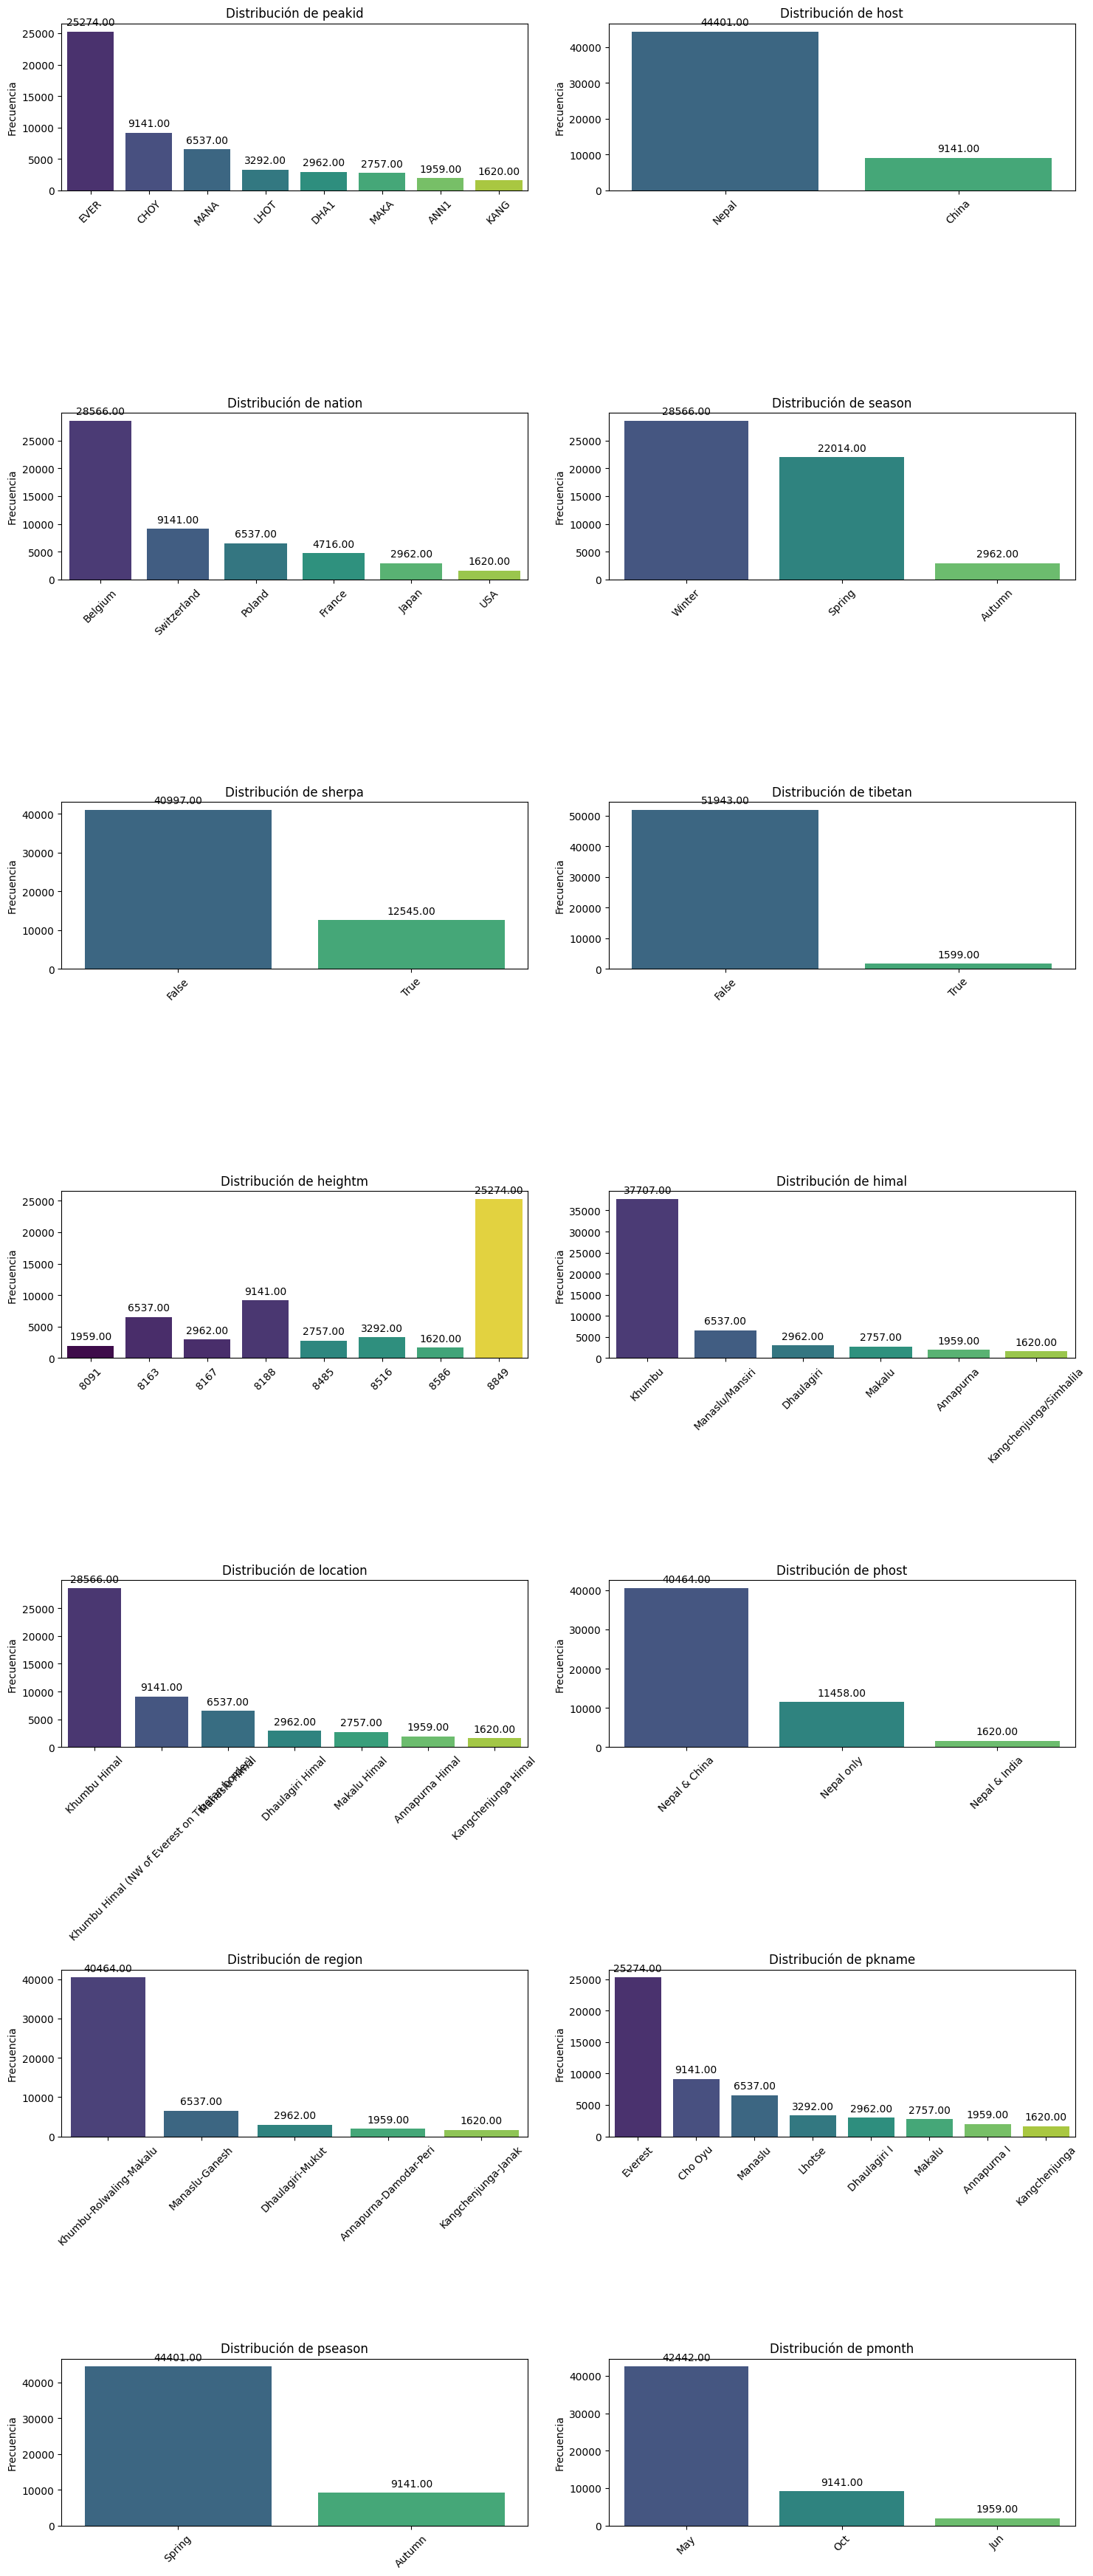

In [15]:
# Graficamos la distribución de nuestras categóricas
bt.pinta_distribucion_categoricas(df_inf, inf_categoricas, relativa=False, mostrar_valores=True)

Continuamos con **df_ach**  
Todas las variables/features son del tipo que le corresponden tras realizar un examen visual

In [16]:
# Para análisis EDA no necesitamos convertirlas a valores numéricos
# df_ach[df_ach.select_dtypes(bool).columns] = df_ach.select_dtypes(bool).astype(int)

In [17]:
# Comprobamos cardinalidad
df_ach_tipo, ach_categoricas, ach_numericas, ach_pendientes = mytb.card_tipo(df_ach)
df_ach_tipo

,Card,%_Card,Tipo,tipo_sugerido
expid_x,6256,11.684285,object,Por clasificar
peakid,8,0.014942,object,Categorica
highpoint,8,0.014942,int64,Categorica
death,2,0.003735,bool,Binaria
mhighpt,2,0.003735,bool,Binaria
mo2none,2,0.003735,bool,Binaria
mo2used,2,0.003735,bool,Binaria
msuccess,2,0.003735,bool,Binaria
psummiters,8,0.014942,object,Categorica


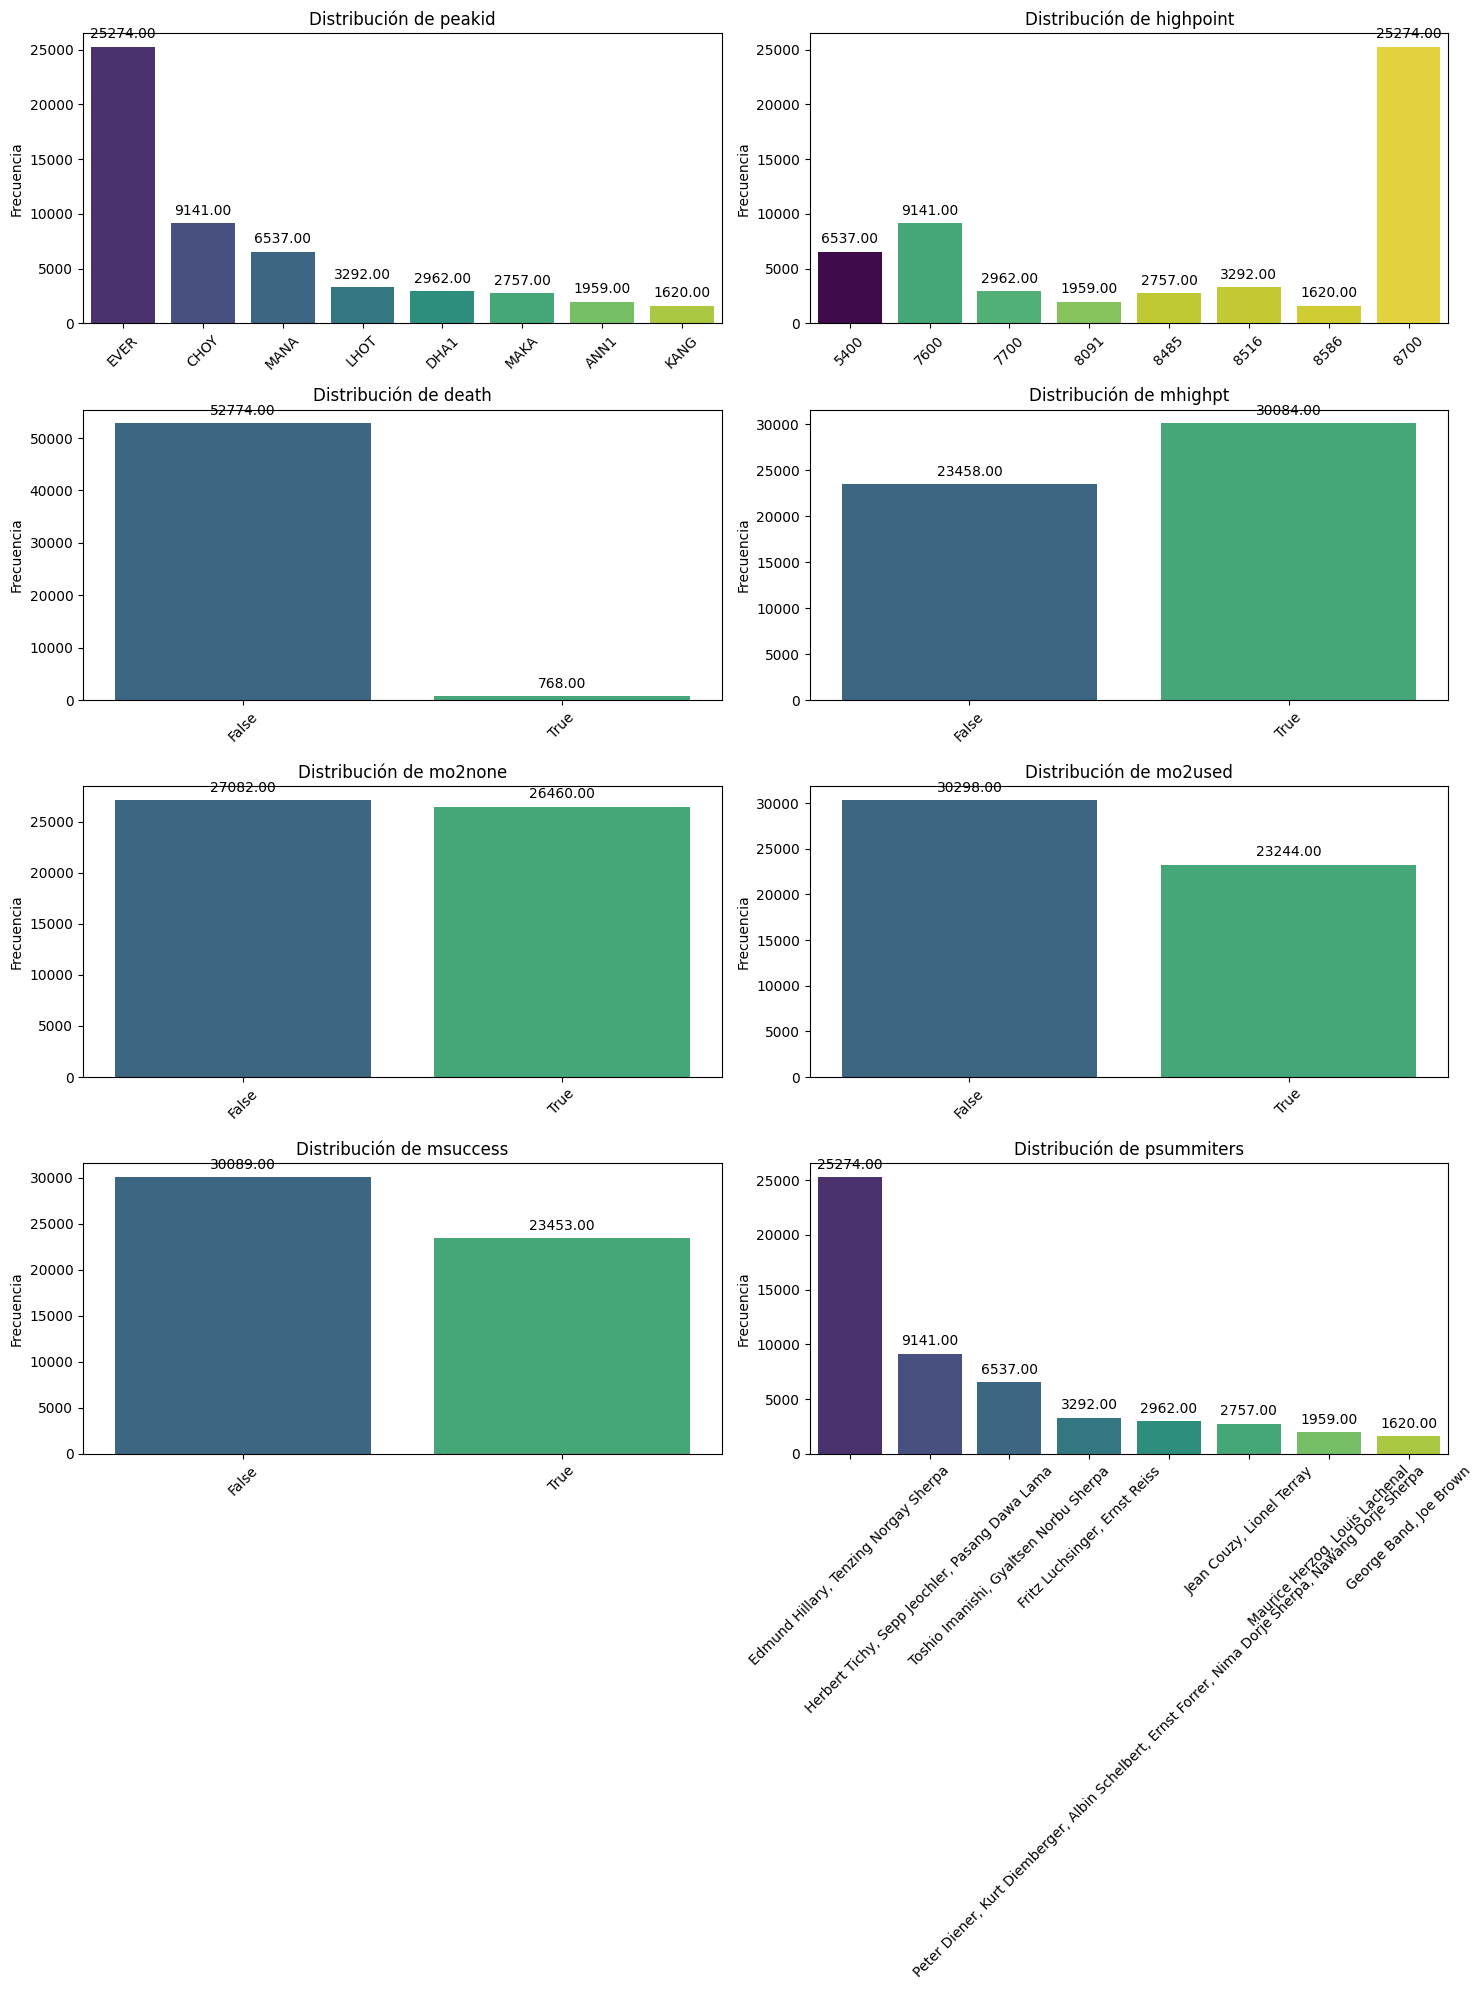

In [18]:
# Graficamos nuestras variables categóricas
bt.pinta_distribucion_categoricas(df_ach, ach_categoricas, relativa=False, mostrar_valores=True)

Seguimos con **df_risk**

In [19]:
# Transformamos nuestras variables al tipo adecuado
# df_risk[df_risk.select_dtypes(bool).columns] = df_risk.select_dtypes(bool).astype(int)
df_risk['deathdate'] = pd.to_datetime(df_risk['deathdate'], format='%Y-%m-%d', errors='coerce')

In [20]:
# Comprobamos cardinalidad
df_risk_tipo, risk_categoricas, risk_numericas, risk_pendientes = mytb.card_tipo(df_risk)
df_risk_tipo

,Card,%_Card,Tipo,tipo_sugerido
expid_x,6256,11.684285,object,Por clasificar
peakid,8,0.014942,object,Categorica
death,2,0.003735,bool,Binaria
deathclass,7,0.013074,object,Categorica
deathdate,468,0.874080,datetime64[ns],Por clasificar
deathhgtm,107,0.199843,int64,Numerica discreta
deathtype,12,0.022412,object,Categorica
hired,2,0.003735,bool,Binaria


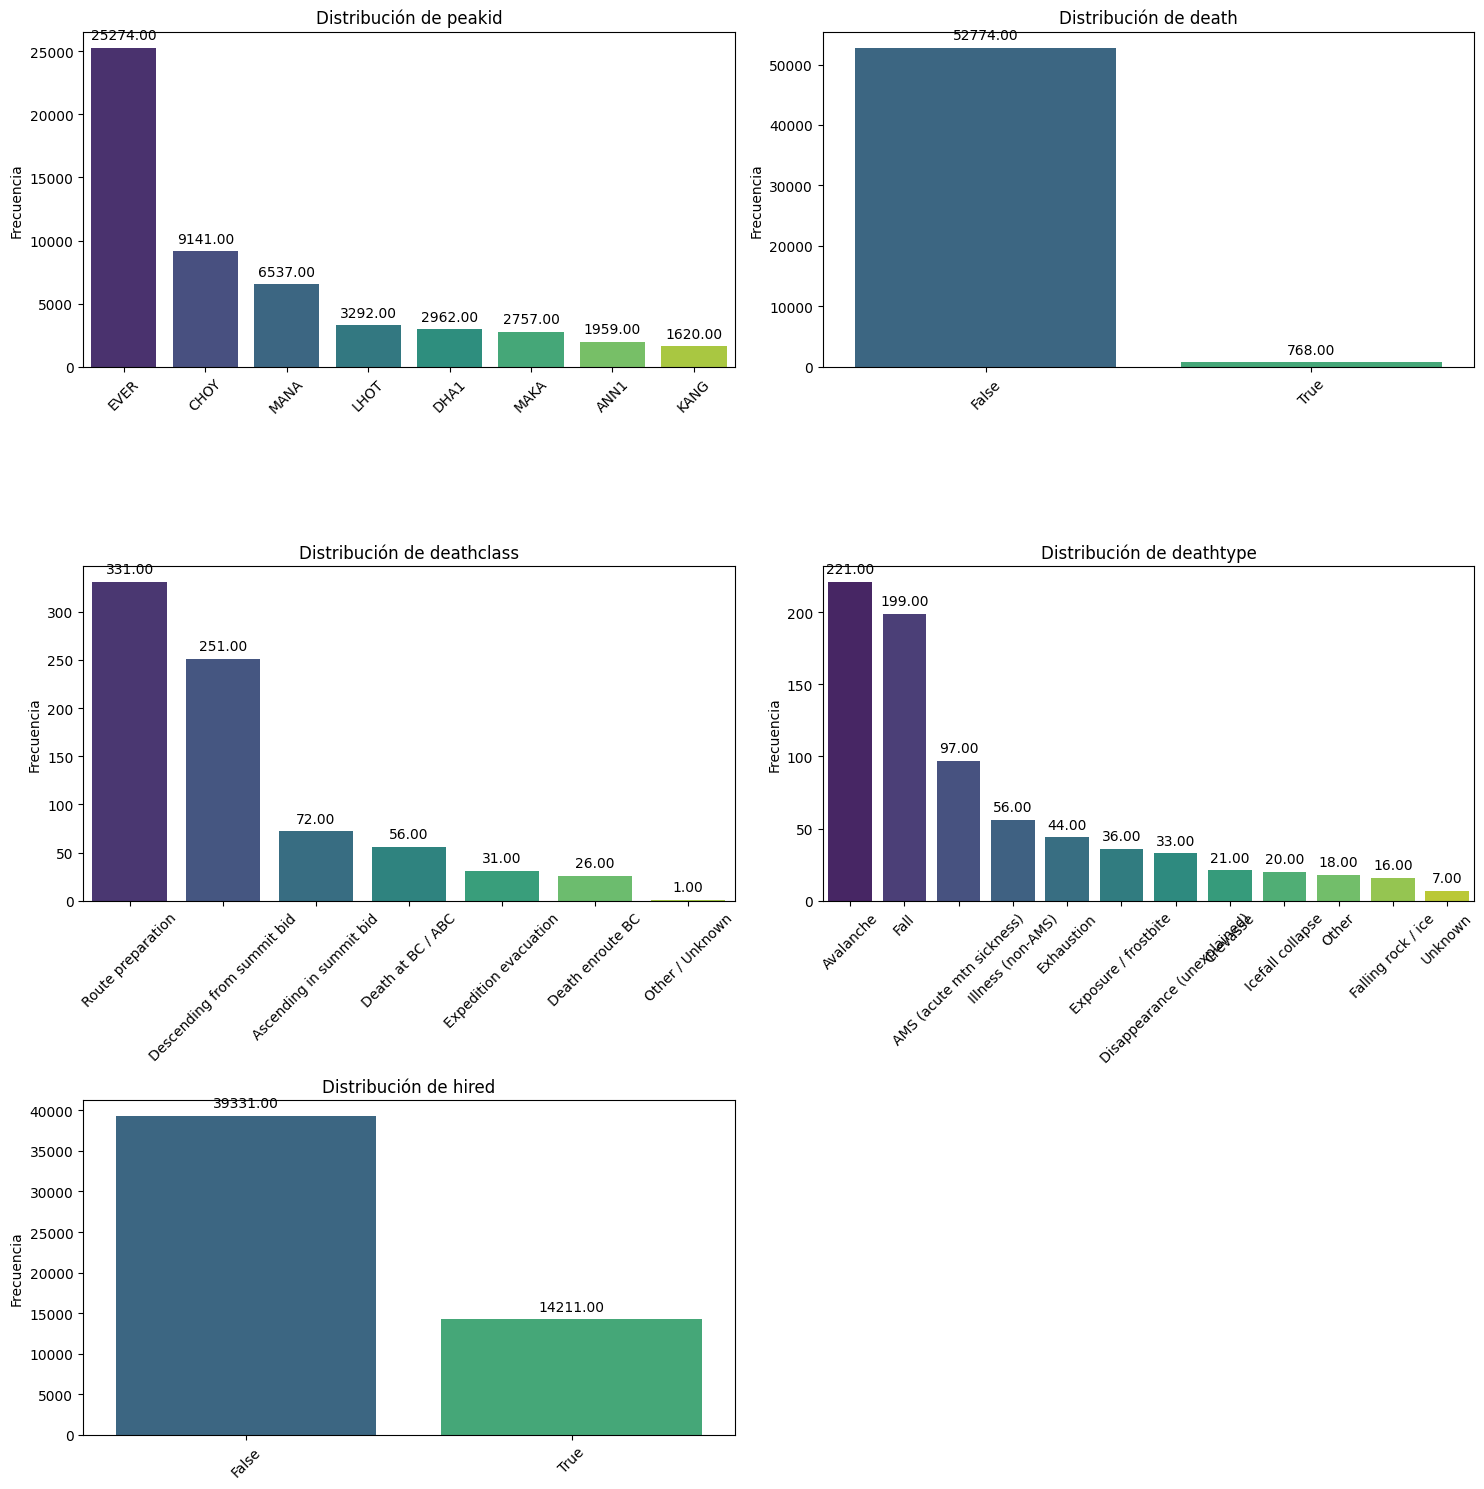

In [21]:
# Graficamos nuestras variables categóricas
bt.pinta_distribucion_categoricas(df_risk, risk_categoricas, relativa=False, mostrar_valores=True)

Terminamos con **df_log**

In [22]:
# Transformamos features en el tipo adecuado
# df_log[df_log.select_dtypes(bool).columns] = df_log.select_dtypes(bool).astype(int)
# df_log['bcdate'] = pd.to_datetime(df_log['bcdate'], format='%Y-%m-%d', errors='coerce')
#df_log['smtdate'] = pd.to_datetime(df_log['smtdate'], format='%Y-%m-%d', errors='coerce')
# df_log['termdate'] = pd.to_datetime(df_log['termdate'], format='%Y-%m-%d', errors='coerce')

In [23]:
# Comprobamos cardinalidad
df_log_tipo, log_categoricas, log_numericas, log_pendientes = mytb.card_tipo(df_log)
df_log_tipo

,Card,%_Card,Tipo,tipo_sugerido
expid_x,6256,11.684285,object,Por clasificar
peakid,8,0.014942,object,Categorica
agency,5,0.009338,object,Categorica
camps,4,0.007471,int64,Categorica
campsites,8,0.014942,object,Categorica
countries,6,0.011206,object,Categorica
leaders,7,0.013074,object,Categorica
o2used,2,0.003735,bool,Binaria
rope,2,0.003735,int64,Binaria
route1,8,0.014942,object,Categorica


c:\Users\MarioSimarroIntelaqu\OneDrive - Intelaqua\TheBridge\Notebooks\04_ Project Break I\Entregable\src\notebooks\../utils\bootcampviztools.py:39: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


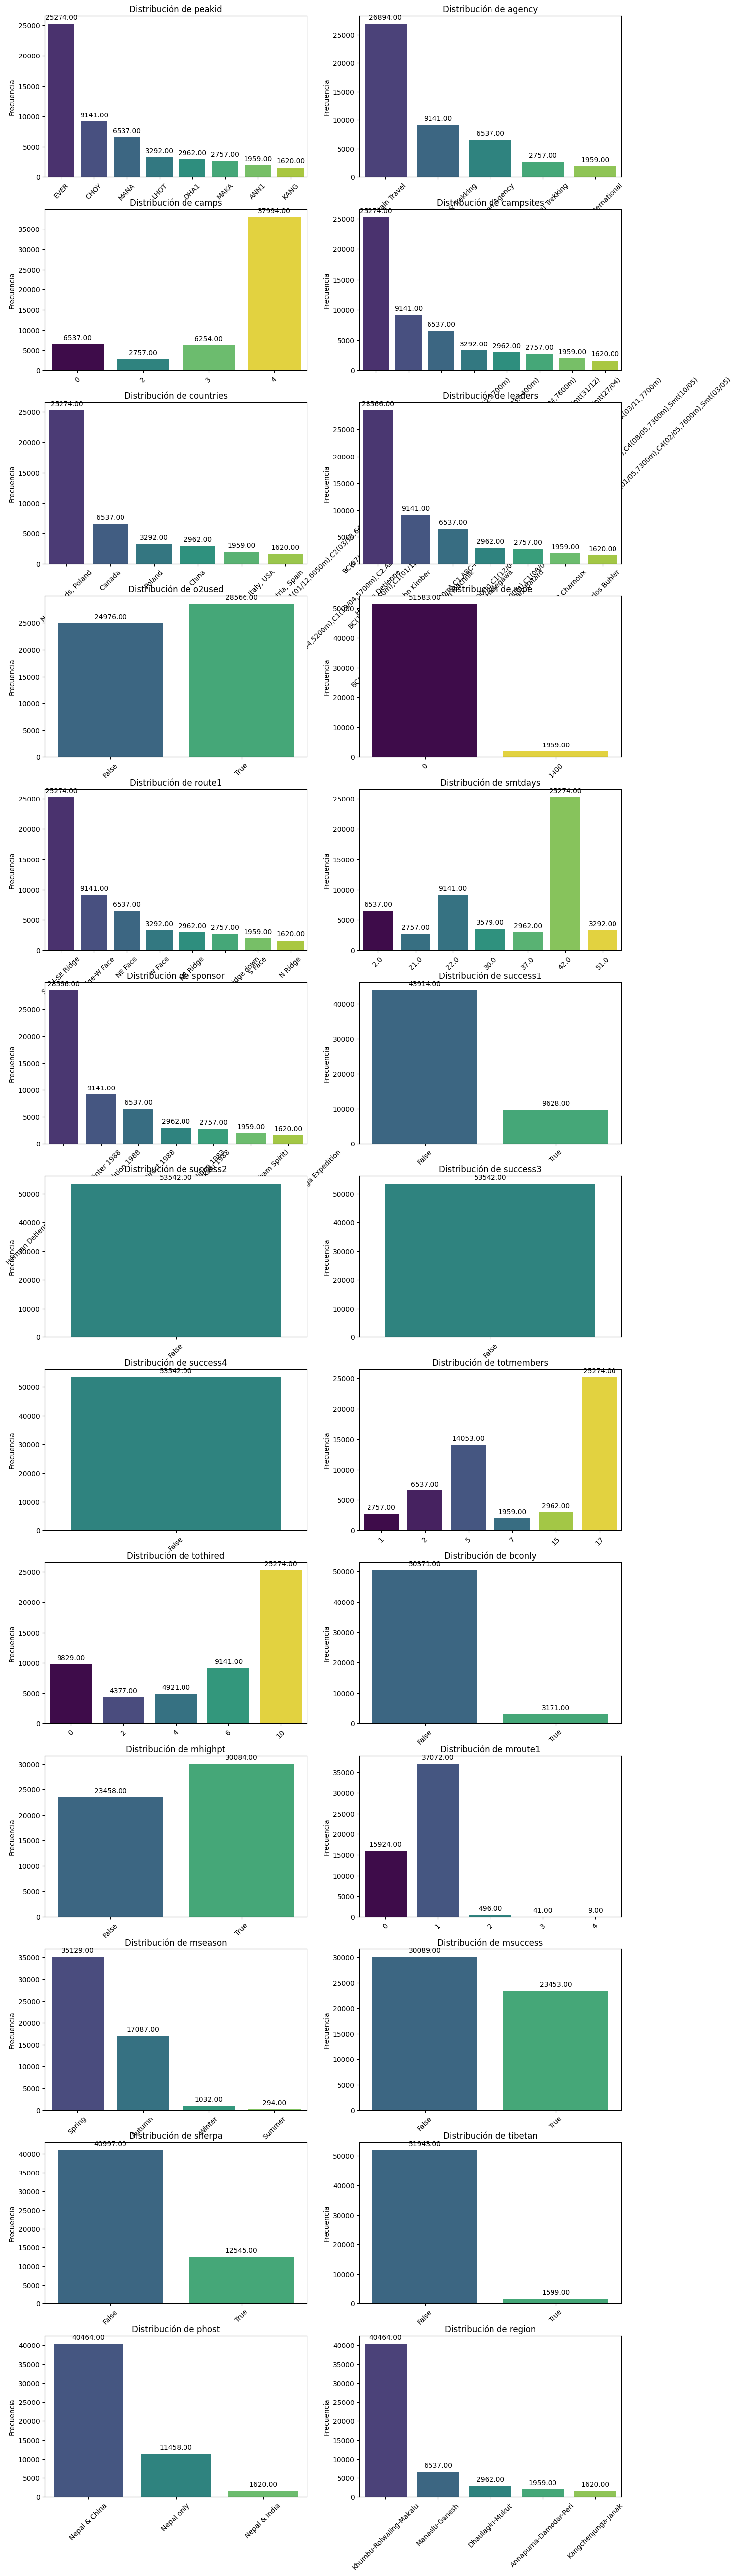

In [24]:
# Graficamos nuestras variables categóricas
bt.pinta_distribucion_categoricas(df_log, log_categoricas, relativa=False, mostrar_valores=True)

13. **Missings**: analiza los valores missings de las variables e investig por qué tienes nulls. En Machine Learning se suelen sustituir por medias o modas pero en Data Analysis resulta interesante analizar por qué hay missings en algunos registros.

**df_inf** no tiene missings

In [25]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   expid_x   53542 non-null  object
 1   peakid    53542 non-null  object
 2   host      53542 non-null  object
 3   nation    53542 non-null  object
 4   season    53542 non-null  object
 5   citizen   53542 non-null  object
 6   myear     53542 non-null  int64 
 7   sherpa    53542 non-null  bool  
 8   tibetan   53542 non-null  bool  
 9   heightm   53542 non-null  int64 
 10  himal     53542 non-null  object
 11  location  53542 non-null  object
 12  phost     53542 non-null  object
 13  region    53542 non-null  object
 14  pkname    53542 non-null  object
 15  pseason   53542 non-null  object
 16  pmonth    53542 non-null  object
dtypes: bool(2), int64(2), object(13)
memory usage: 6.6+ MB


In [26]:
# Almacenamos nuestras variables numéricas
inf_numericas = df_inf.select_dtypes(include=["int64", "float64"]).columns.tolist()

Seguimos con el dataframe **df_ach**
No hay faltantes

In [27]:
df_ach.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   expid_x     53542 non-null  object
 1   peakid      53542 non-null  object
 2   highpoint   53542 non-null  int64 
 3   death       53542 non-null  bool  
 4   mhighpt     53542 non-null  bool  
 5   mo2none     53542 non-null  bool  
 6   mo2used     53542 non-null  bool  
 7   msuccess    53542 non-null  bool  
 8   psummiters  53542 non-null  object
dtypes: bool(5), int64(1), object(3)
memory usage: 2.3+ MB


In [28]:
# Almacenamos nuestro target y variables numéricas
ach_target = "msuccess"
ach_numericas = df_ach.select_dtypes(include=["int64", "float64"]).columns.tolist()

Seguimos con el dataframe **df_risk**


In [29]:
df_risk.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   expid_x     53542 non-null  object        
 1   peakid      53542 non-null  object        
 2   death       53542 non-null  bool          
 3   deathclass  768 non-null    object        
 4   deathdate   750 non-null    datetime64[ns]
 5   deathhgtm   53542 non-null  int64         
 6   deathtype   768 non-null    object        
 7   hired       53542 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(4)
memory usage: 3.0+ MB


In [30]:
# Tratamaos las faltantes en df_risk
df_risk["deathclass"] = df_risk["deathclass"].fillna("No death") # Los faltantes es porque no hubo fallecidos en esa expedición.
df_risk["deathtype"] = df_risk["deathtype"].fillna("No death") # Los faltantes es porque no hbo fallecidos en esa expedición.
df_risk["deathdate"] = df_risk["deathdate"].fillna("1900-01-01") # Asignamos una fecha por defecto para evitar NaT en las operaciones posteriores 
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   expid_x     53542 non-null  object        
 1   peakid      53542 non-null  object        
 2   death       53542 non-null  bool          
 3   deathclass  53542 non-null  object        
 4   deathdate   53542 non-null  datetime64[ns]
 5   deathhgtm   53542 non-null  int64         
 6   deathtype   53542 non-null  object        
 7   hired       53542 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(4)
memory usage: 3.0+ MB


In [31]:
# Almacenamos nuestro target y variables numéricas
risk_target = "death"
risk_numericas = df_risk.select_dtypes(include=["int64", "float64"]).columns.tolist()

Seguimos con el dataframe **df_log**


In [32]:
# Hacemos un primer mapeo de df_log
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   expid_x     53542 non-null  object 
 1   peakid      53542 non-null  object 
 2   agency      47288 non-null  object 
 3   camps       53542 non-null  int64  
 4   campsites   53542 non-null  object 
 5   countries   41644 non-null  object 
 6   leaders     53542 non-null  object 
 7   o2used      53542 non-null  bool   
 8   rope        53542 non-null  int64  
 9   route1      53542 non-null  object 
 10  smtdays     53542 non-null  float64
 11  sponsor     53542 non-null  object 
 12  success1    53542 non-null  bool   
 13  success2    53542 non-null  bool   
 14  success3    53542 non-null  bool   
 15  success4    53542 non-null  bool   
 16  totmembers  53542 non-null  int64  
 17  tothired    53542 non-null  int64  
 18  bconly      53542 non-null  bool   
 19  mhighpt     53542 non-null  b

In [33]:
# Tratatmaos las faltantes en df_log
df_log["agency"] = df_log["agency"].fillna("UNK") # Los faltantes es porque no hbo fallecidos en esa expedición.
df_log["campsites"] = df_log["campsites"].fillna("UNK") # No hay información registrada
df_log["countries"] = df_log["countries"].fillna("UNK") # No hay información registrada
df_log["countries"] = df_log["countries"].fillna("UNK") # No hay información registrada
df_log["sponsor"] = df_log["sponsor"].fillna("UNK") # No hay información registrada
df_log = df_log.dropna(subset=["leaders"])

df_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53542 entries, 52 to 88968
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   expid_x     53542 non-null  object 
 1   peakid      53542 non-null  object 
 2   agency      53542 non-null  object 
 3   camps       53542 non-null  int64  
 4   campsites   53542 non-null  object 
 5   countries   53542 non-null  object 
 6   leaders     53542 non-null  object 
 7   o2used      53542 non-null  bool   
 8   rope        53542 non-null  int64  
 9   route1      53542 non-null  object 
 10  smtdays     53542 non-null  float64
 11  sponsor     53542 non-null  object 
 12  success1    53542 non-null  bool   
 13  success2    53542 non-null  bool   
 14  success3    53542 non-null  bool   
 15  success4    53542 non-null  bool   
 16  totmembers  53542 non-null  int64  
 17  tothired    53542 non-null  int64  
 18  bconly      53542 non-null  bool   
 19  mhighpt     53542 non-null  b

In [34]:
# Almacenamos nuestro target y variables numéricas
log_target = "success"
log_numericas = df_log.select_dtypes(include=["int64", "float64"]).columns.tolist()

14. **Outliers**: al igual que con los missings, los outliers suelen meter ruido innecesario en los modelos, y distorsiona su entrenamiento con datos que no son representativos de la muestra, por lo que se suelen eliminar. En el caso de Data Analysis no es necesario, sino que resulta interesante destacar outliers y por qué de los mismos.¿Cómo detectar outliers?

Vamos con **df_info** para nuestras variables numéricas.
Entendemos que sólo tiene sentido par alas numéricas aunque, en menor caso, para las categóricas pero ya vimos la distribución de categóricas y no hay nada extraño que nos induzca a buscar outliers en esas features

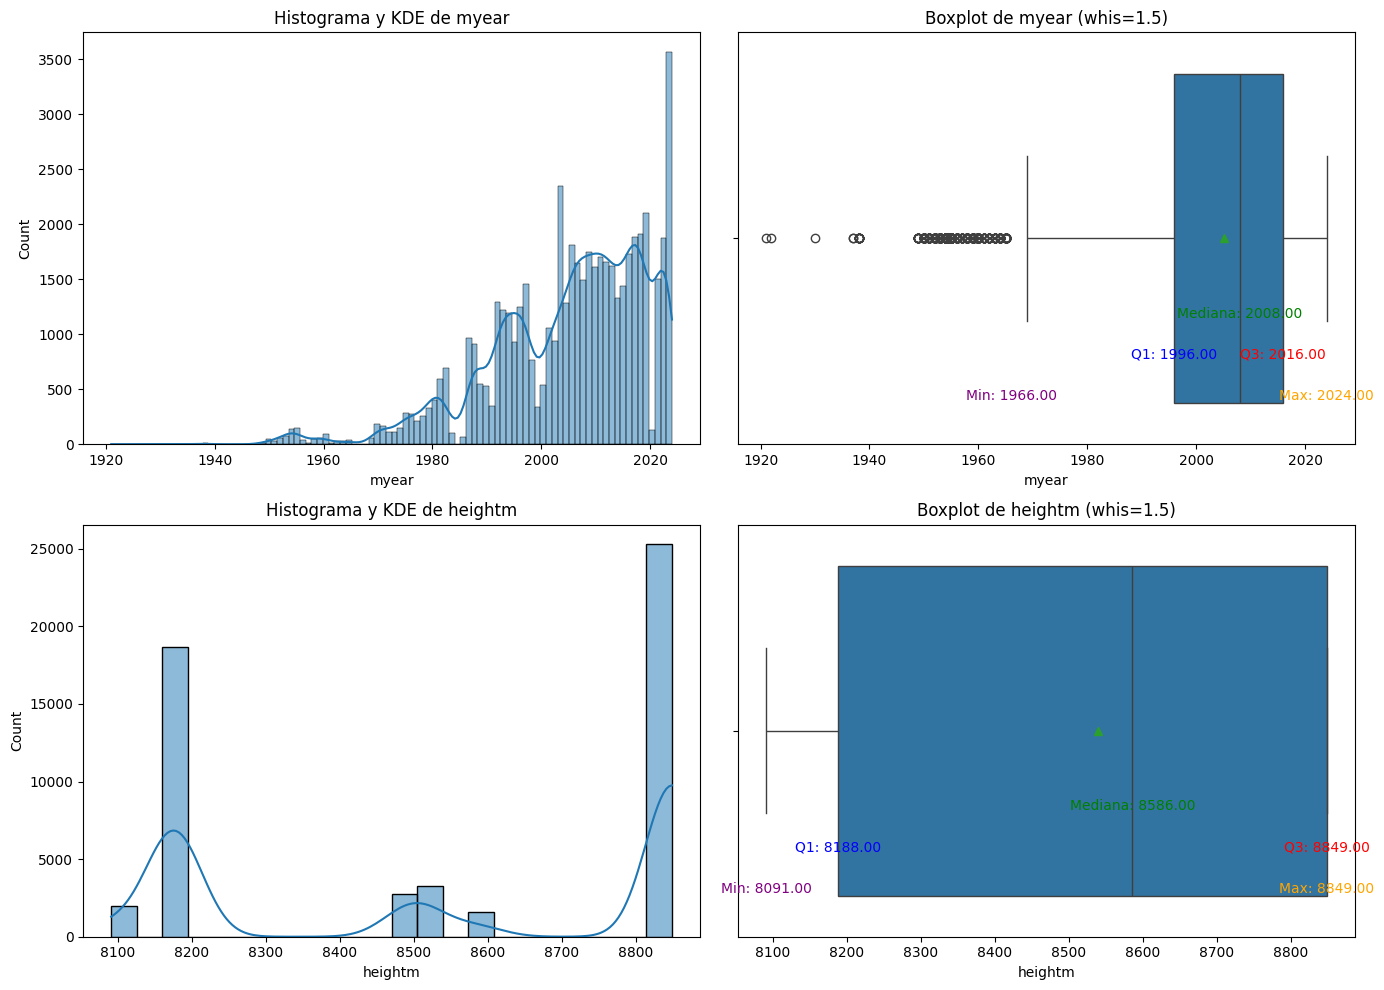

In [35]:
#bt.plot_combined_graphs(df_inf, inf_numericas, whisker_width=1.5, bins = False)
mytb.plot_combined_graphs_plus(df_inf, inf_numericas, whisker_width=1.5, bins = False)

Continuamos con los outliers del dataframe **df_ach**

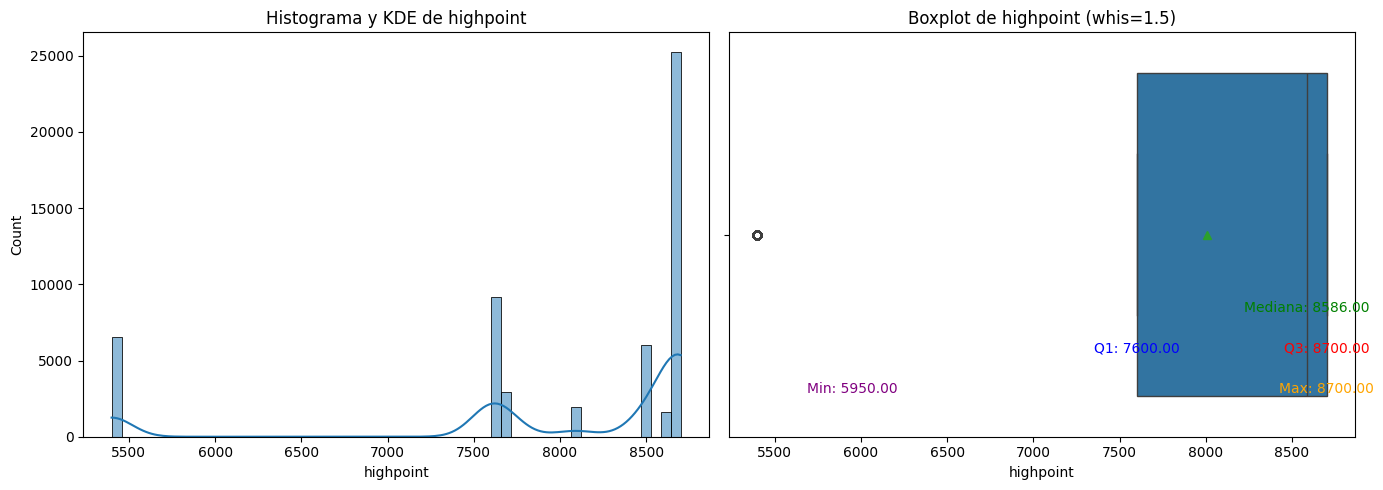

In [36]:
#bt.plot_combined_graphs(df_inf, inf_numericas, whisker_width=1.5, bins = False)
mytb.plot_combined_graphs_plus(df_ach, ach_numericas, whisker_width=1.5, bins = False)

Continuamos con los outliers del dataframe **df_risk**

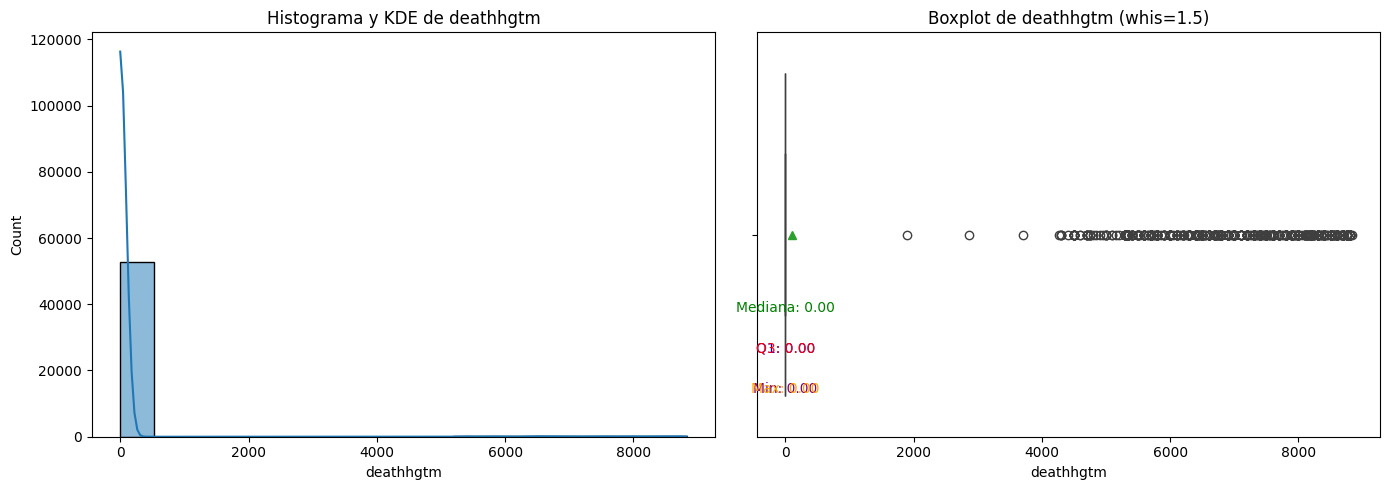

In [37]:
#bt.plot_combined_graphs(df_inf, inf_numericas, whisker_width=1.5, bins = False)
mytb.plot_combined_graphs_plus(df_risk, risk_numericas, whisker_width=1.5, bins = False)

Terminamos con los outliers del dataframe **df_log**

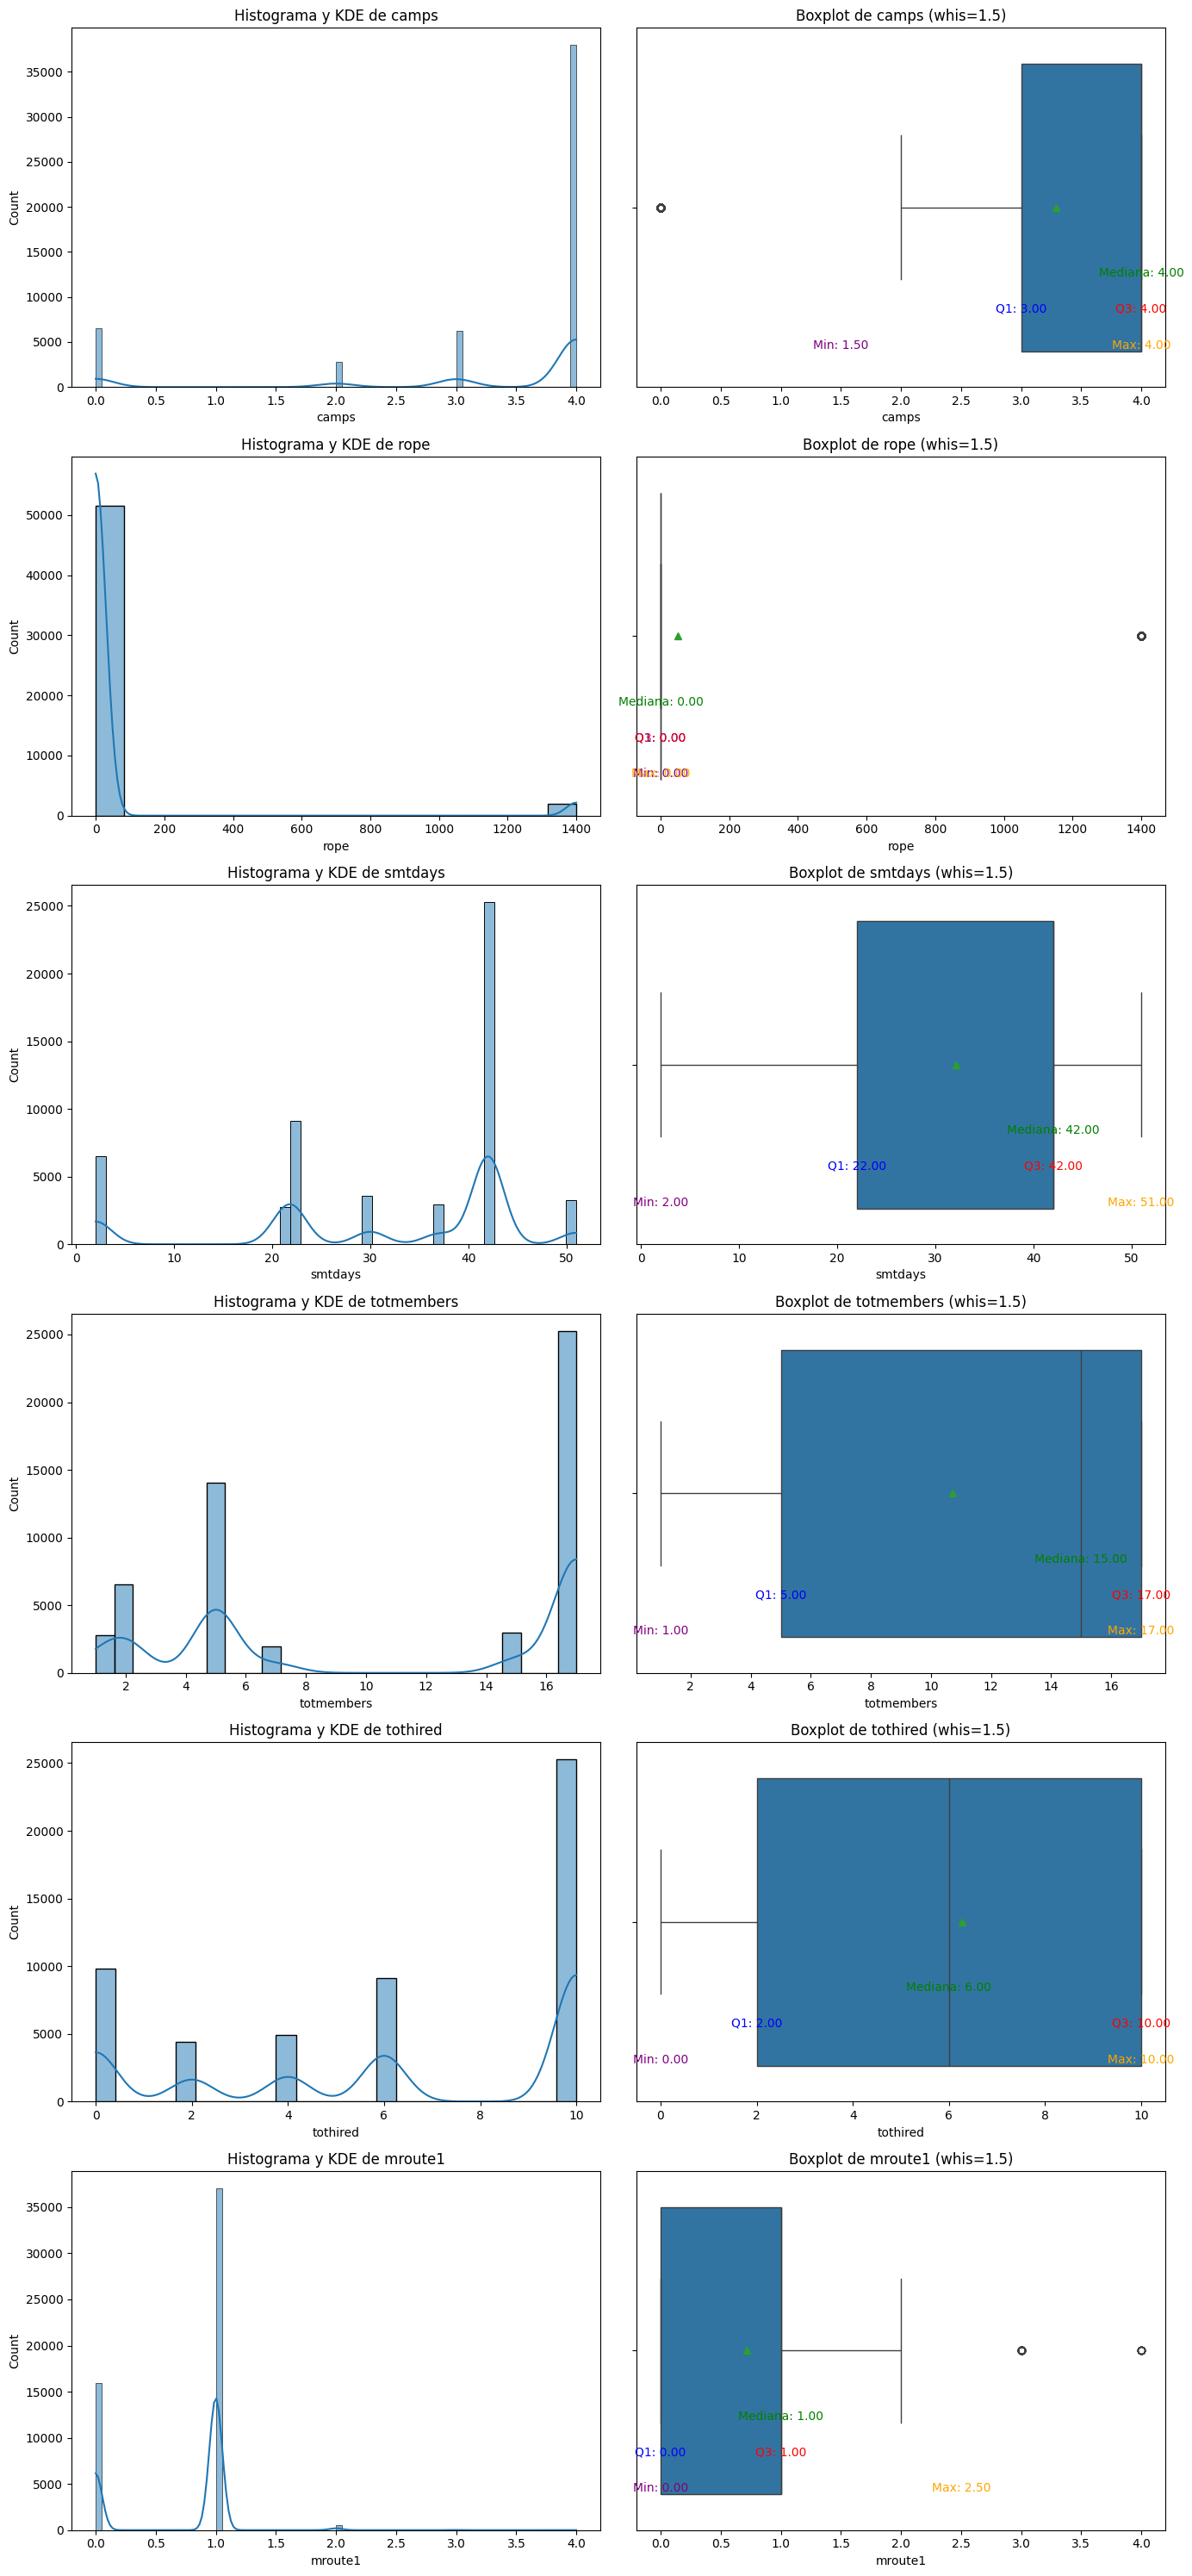

In [38]:
#bt.plot_combined_graphs(df_inf, inf_numericas, whisker_width=1.5, bins = False)
mytb.plot_combined_graphs_plus(df_log, log_numericas, whisker_width=1.5, bins = False)

15. **Duplicados**: elimina los registros duplicados.

In [39]:
# Creamos una pequeña funcion para eliminar dulicados de neustros dataframes
def fuera_duplicados(datafs):
    for name in datafs:
        df = globals()[name]
        print(f"\nTamaño original de {name}:", df.shape)
        df.drop_duplicates(inplace=True)
        print(f"Tamaño despues de eliminar duplicados en {name}:", df.shape)
        
        # Como tenemos distintos notebooks guardaremos el resultado para facilitar la ejecucioon
        df.to_csv(f'../data/own/{name}.csv', index=False)

fuera_duplicados(list_dfs)


Tamaño original de df_ach: (53542, 9)
Tamaño despues de eliminar duplicados en df_ach: (12821, 9)

Tamaño original de df_risk: (53542, 8)
Tamaño despues de eliminar duplicados en df_risk: (10425, 8)

Tamaño original de df_log: (53542, 27)
Tamaño despues de eliminar duplicados en df_log: (17183, 27)

Tamaño original de df_inf: (53542, 17)
Tamaño despues de eliminar duplicados en df_inf: (17800, 17)


16. **Escalado**: si queremos comparar variables con distintas escalas, tendremos que transformarlas a la misma mediante un MinMaxScaler.

No es necesario en este caso

17. **Transformaciones**: sacar nuevas variables a partir de las anteriores, mediante ratios numéricos, binning, datos de las fechas (año, dia, mes).

No es necesario en este caso